<a href="https://colab.research.google.com/github/MuhannedSh/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales

- Author: Muhanned Shaheen


## Project Overview
- This project revolves around exploring and understanding sales data from a retail store. we aim to provide actionable insights that can inform strategic business decisions.



## Load and Import Data




In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_selector as selector
pd.set_option('display.max_columns',100)
import missingno as msno
from sklearn.inspection import permutation_importance
import missingno
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')


In [164]:
from google.colab import drive
drive.mount('/content/drive')

fpath='/content/drive/MyDrive/StudentFolders16wk24wk/CodingDojo/01-Fundamentals/Week03/Data/sales_predictions_2023.csv'
df=pd.read_csv(fpath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Clean Data
**Data Set Summary**

- Rows:
  - `8523`

- Columns:
  - `12`
  

In [165]:
cat_col=df.select_dtypes('object').columns
num_col=df.select_dtypes('number').columns
df[cat_col].shape
df[num_col].shape

#Inspecting duplicate values.
dub_values=df.duplicated()
df[dub_values].sum()

#Identify missing categorical values.
df[cat_col].isna().sum()

#Addressing the missing categorical values by using a placeholder value.
df[cat_col]=df[cat_col].fillna(np.nan)

#Confirming that there are no missing categorical values
df[cat_col].isna().sum()

#Identify missing numircal values.
df[num_col].isna().sum()

#Addressing the missing numircal values by using a placeholder value.
df[num_col]=df[num_col].fillna(np.nan)

#Confirming that there are no missing numircal values
df[num_col].isna().sum()

#Finding and fixing any inconsistent categories of data
for col in cat_col:
  print(f'Value For {col} column is: ')
  print(df[col].value_counts())
  print('\n')

#inconsistent categories in Item_Fat_Content
replacement_dict={'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(replacement_dict)

#inconsistent categories in Outlet_Identifier

df['Outlet_Identifier'].value_counts()
df.info()

#inconsistent categories in Outlet_Size
df['Outlet_Size']=df['Outlet_Size'].str.replace('High','Large')
df['Outlet_Size'].value_counts()

# Summary statistics for numerical columns
numerical_summary = df.describe()

# Display the summary statistics
print("\nSummary Statistics for Numerical Columns:")
print(numerical_summary)



Value For Item_Identifier column is: 
Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64


Value For Item_Fat_Content column is: 
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Value For Item_Type column is: 
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Value For Outlet_Identifier column is: 
Outlet_Identifier


- Data Dictionary


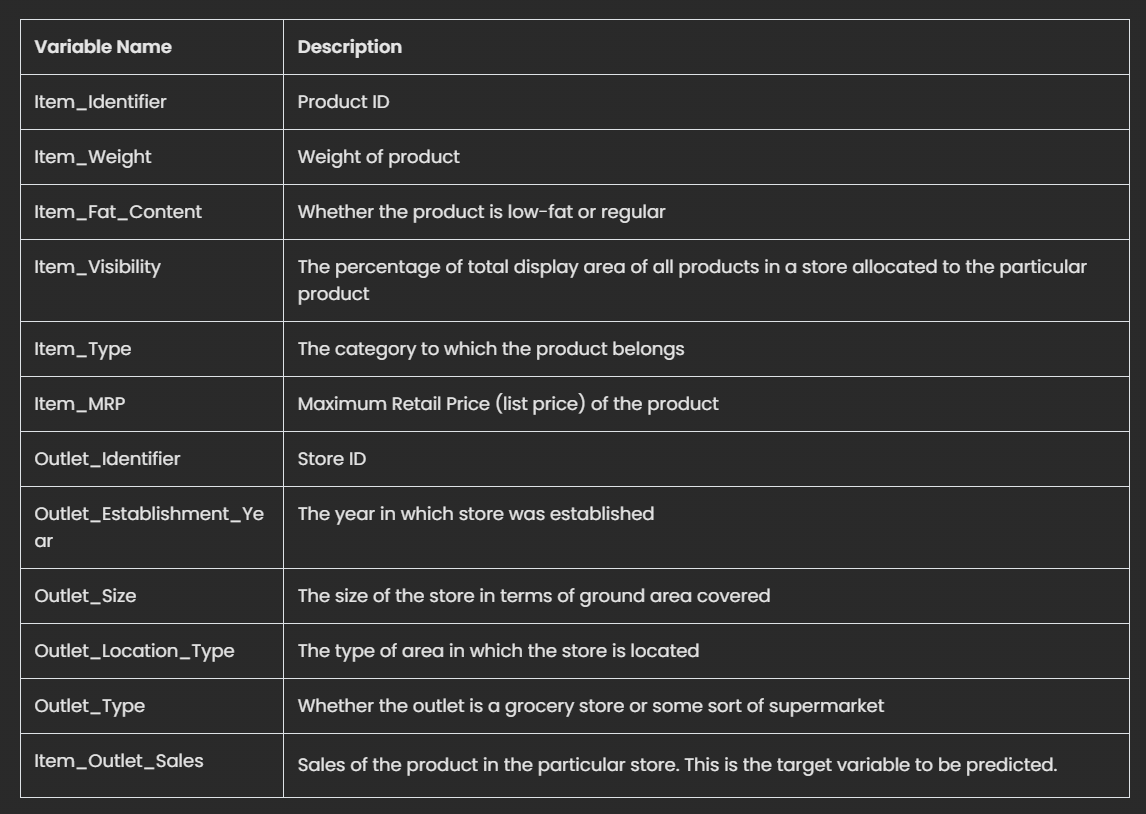

## Exploratory Data Analysis


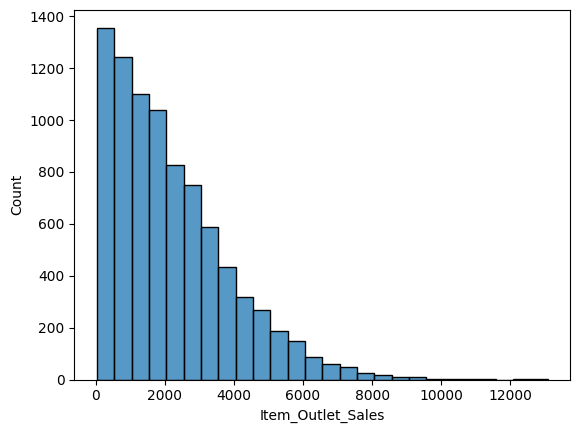

In [166]:
fig,ax=plt.subplots()
ax=sns.histplot(data=df,x='Item_Outlet_Sales',bins=30,binwidth=500);


- The histogram graph illustrates the frequency distribution of outlet item sales showing how many items fall into different sales value ranges

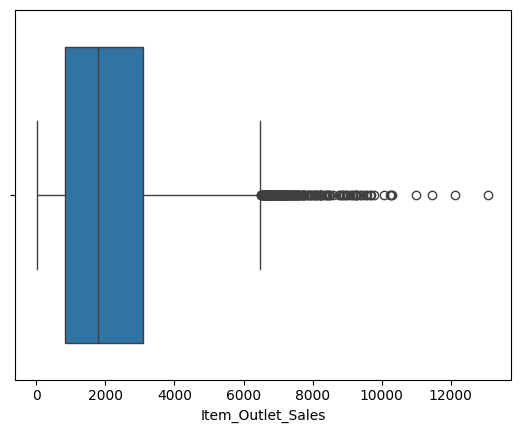

In [167]:
ax = sns.boxplot(data=df,x='Item_Outlet_Sales')


- the figure shows the statistical values for items oultet sales , showing that the avarage amount of  item sald 1900 $.

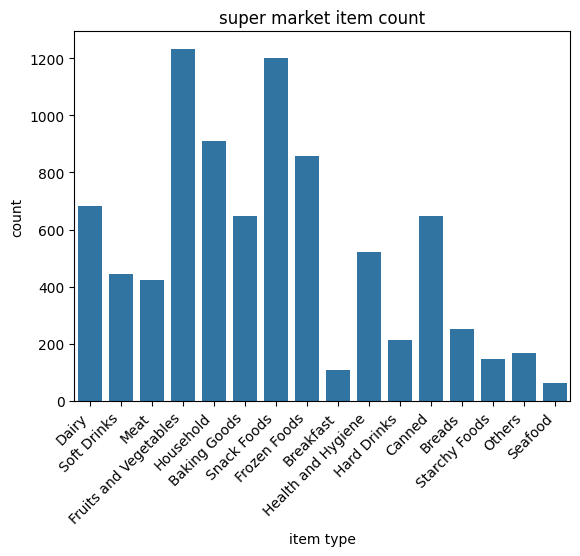

In [168]:
cat_col
ax = sns.countplot(data=df, x='Item_Type');
plt.xticks(rotation=45, ha='right')
ax.set(title='super market item count',xlabel='item type');

- The Figure illstrate that the highest counts are found in "Fruits and Vegetables" with 1232 instances, followed by "Snack Foods" at 1200 and "Household" at 910. Conversely, the lowest counts are seen in "Seafood" with 64 instances, "Breakfast" with 110, and "Starchy Foods" with 148. This distribution offers insights into the varying popularity of different item types within the dataset, informing strategic decisions regarding inventory management and marketing efforts.

In [251]:
item_counts = df['Item_Type'].value_counts()

# Sort the item counts from highest to lowest
item_counts_sorted = item_counts.sort_values(ascending=False)

# Display the sorted item counts
print(item_counts_sorted)

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


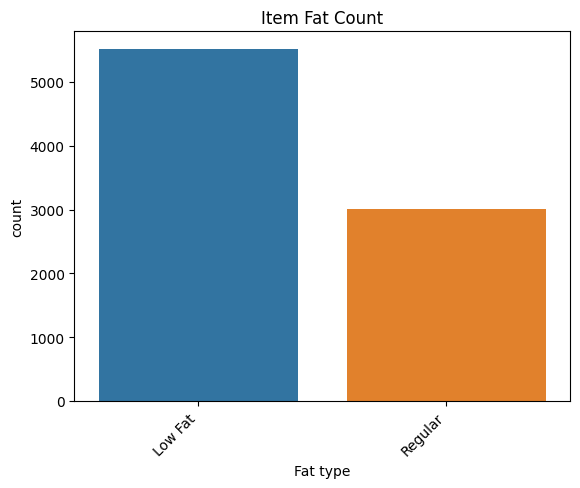

In [169]:
ax=sns.countplot(data=df, x='Item_Fat_Content',hue='Item_Fat_Content')
plt.xticks(rotation=45, ha='right')
ax.set(title='Item Fat Count',xlabel='Fat type');


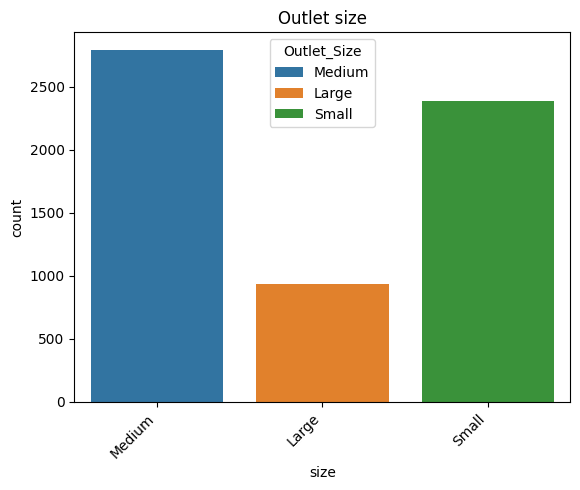

In [170]:
ax=sns.countplot(data=df, x='Outlet_Size',hue='Outlet_Size')
plt.xticks(rotation=45, ha='right')
ax.set(title='Outlet size',xlabel='size');


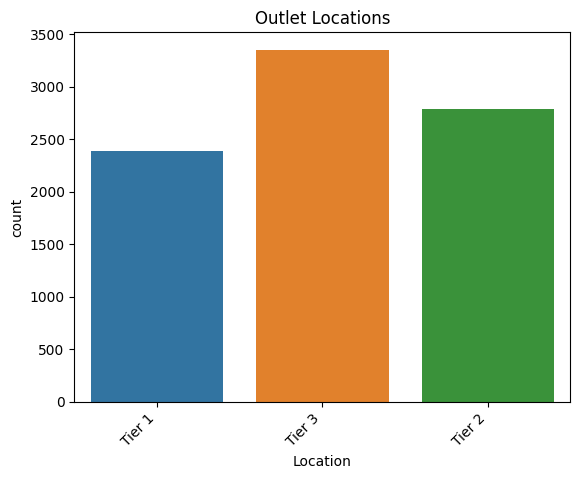

In [171]:
ax=sns.countplot(data=df, x='Outlet_Location_Type',hue='Outlet_Location_Type')
plt.xticks(rotation=45, ha='right')
ax.set(title='Outlet Locations',xlabel='Location');


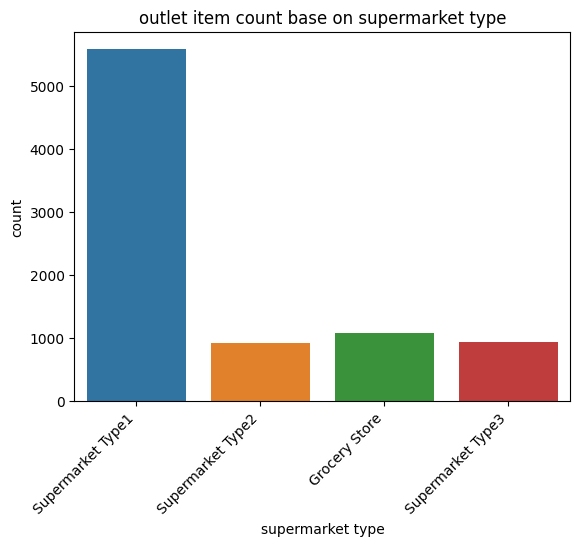

In [172]:

ax=sns.countplot(data=df, hue='Outlet_Type',x='Outlet_Type')
plt.xticks(rotation=45, ha='right')
ax.set(title='outlet item count base on supermarket type',xlabel='supermarket type');


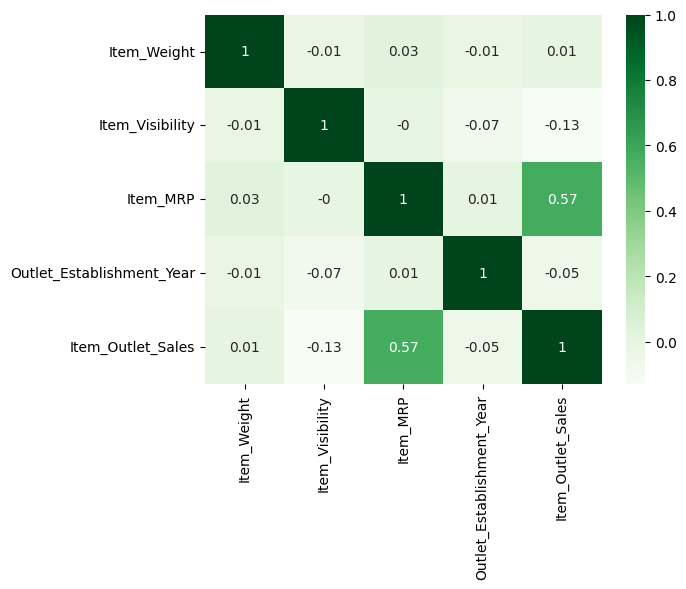

In [173]:
corr=df.corr(numeric_only=True)
corr=corr.round(2)
ax=sns.heatmap(data=corr,cmap='Greens',annot=True)

# Feature Inspection


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Explore categorical values:

In [175]:
def explore_categorical(df,x,placeholder='MISSING',fillna=True,figsize=(6,8),order_data=None):
  df_temp=df.copy()
  if fillna==True:
    df_temp[x]=df_temp[x].fillna(placeholder)
  fig,ax=plt.subplots(figsize=figsize)
  ax=sns.countplot(data=df_temp,x=x,order=order_data)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
  ax.set_title(f'column: {x}')
  fig.tight_layout()
  plt.show()

  #missing values:
  missing_count=df_temp[x].isna().sum()
  missing_perc=missing_count/len(df_temp)*100
  print(f'- number of missing values in {x} is: {missing_count}, and it represent {missing_perc}% of it')
  #for nunique
  nunique = df_temp[x].nunique()
  print(f"- Unique Values: {nunique}")
  #for max value
  most_comm_ser=df_temp[x].value_counts(dropna=False)
  most_comm_index = most_comm_ser.index[0]
  most_comm_val=most_comm_ser[0]
  most_comm_per=round(most_comm_val/len(df_temp)*100,2)
  print(f'- Most common value is {most_comm_index} and it appears {most_comm_val} times, and it represent {most_comm_per}% of its data')
  if most_comm_per >98:
    print(f'- The value of {x} is constant ')
  else:
    print(f'- {x} data are quasi-constant')
  return fig,ax

- Explore item fat contents

<ipython-input-175-ee7110721364>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


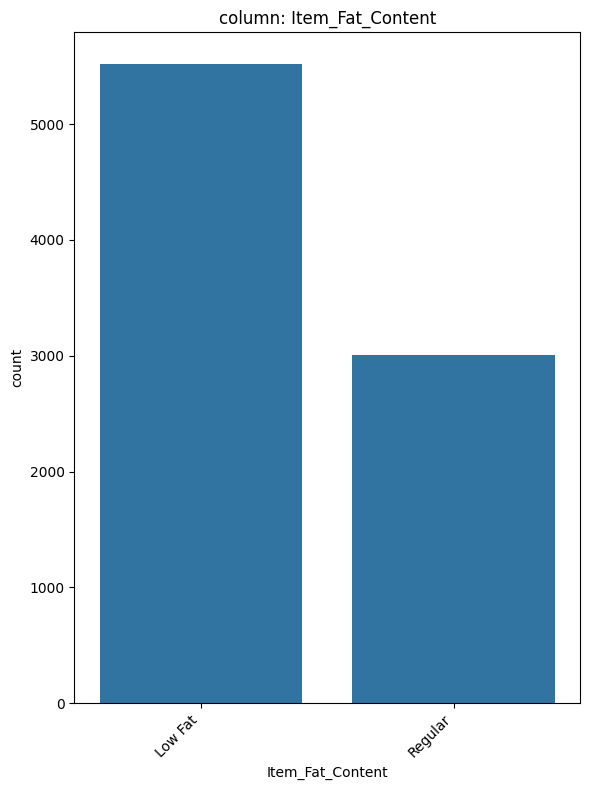

- number of missing values in Item_Fat_Content is: 0, and it represent 0.0% of it
- Unique Values: 2
- Most common value is Low Fat and it appears 5517 times, and it represent 64.73% of its data
- Item_Fat_Content data are quasi-constant


(<Figure size 600x800 with 1 Axes>,
 <Axes: title={'center': 'column: Item_Fat_Content'}, xlabel='Item_Fat_Content', ylabel='count'>)

In [176]:
explore_categorical(df,'Item_Fat_Content')

- Answer the following questions from the Feature Inspection lesson in a markdown cell:
  - What type of feature is it? (Categorical (nominal), ordinal, numeric)
    - Categorical

  - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
    - 0 null values.
    - Nothing to impute.


  - Is the feature constant or quasi-constant?
What is the cardinality? Is it high (>10)?
    - No, the most common value only occurs in 64.73% of the values. The threshold for quasi-constant is more than 98%


  - Would we know this feature before the target is determined?
Is there a business case/understanding reason to exclude based on our business case?

    - Yes, the owner can choose weather focusing on low fat or high fat types based on its affection on sales profit.

- explore outlet type

<ipython-input-175-ee7110721364>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


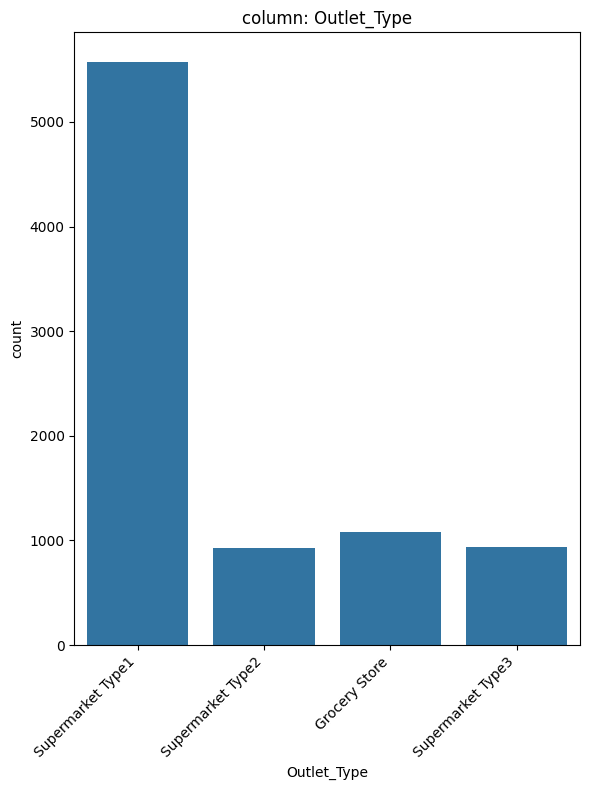

- number of missing values in Outlet_Type is: 0, and it represent 0.0% of it
- Unique Values: 4
- Most common value is Supermarket Type1 and it appears 5577 times, and it represent 65.43% of its data
- Outlet_Type data are quasi-constant


In [177]:
explore_categorical(df,'Outlet_Type');

- Answer the following questions from the Feature Inspection lesson in a markdown cell:
  - What type of feature is it? (Categorical (nominal), ordinal, numeric)
    - Categorical

  - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
    - 0 null values.
    - Nothing to impute.


  - Is the feature constant or quasi-constant?
What is the cardinality? Is it high (>10)?
    - No, the most common value only occurs in 65.43% of the values. The threshold for quasi-constant is more than 98%


  - Would we know this feature before the target is determined?
Is there a business case/understanding reason to exclude based on our business case?

    - Yes, the owner can choose outlet type based on affection on sale profit.

## Explore numrical values

In [178]:
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

- Explore item visibility

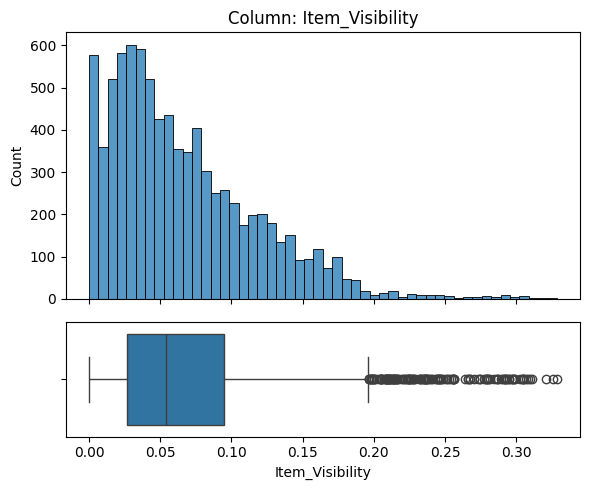

- NaN's Found: 0 (0.0%)


In [179]:
explore_numeric(df,'Item_Visibility')

- Answer the following questions from the Feature Inspection lesson in a markdown cell:
  - What type of feature is it? (Categorical (nominal), ordinal, numeric)
    - Numaric

  - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
    - No null values


  - Is the feature constant or quasi-constant?
What is the cardinality? Is it high (>10)?
    - no


  - Would we know this feature before the target is determined?
Is there a business case/understanding reason to exclude based on our business case?

    - Yes, the owner can change the visibility of his items.

- Explore Maximum Retail Price of the product

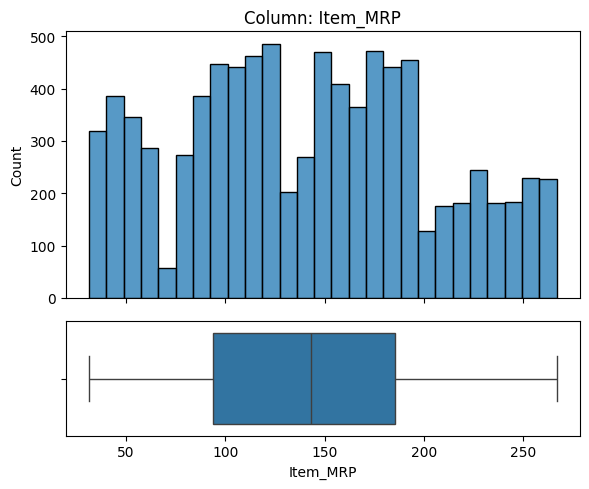

- NaN's Found: 0 (0.0%)


In [180]:
explore_numeric(df,'Item_MRP')

- Answer the following questions from the Feature Inspection lesson in a markdown cell:
  - What type of feature is it? (Categorical (nominal), ordinal, numeric)
    - Numaric

  - How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
    - No null values


  - Is the feature constant or quasi-constant?
What is the cardinality? Is it high (>10)?
    - no


  - Would we know this feature before the target is determined?
Is there a business case/understanding reason to exclude based on our business case?

    - Yes, the owner can change the Maximum Retail Price of his products.

##  Numrical multivariate visualization plotting





In [181]:
def plot_numeric_vs_target(df,x,y='Item_Outlet_Sales',figsize=(6,6), **kwargs):
  corr=df[[x,y]].corr().round(2)
  r=corr.loc[x,y]
  fig,ax=plt.subplots(figsize=figsize)
  sctr_kws={'lw':1,'ec':'white','alpha':1}
  ax=sns.regplot(data=df,x=x,y=y,scatter_kws=sctr_kws);
  ax.set(title=f'{x} vs {y} r={r}')
  fig.tight_layout()
  return fig,ax




- ploting item outlet sales vs items visibility

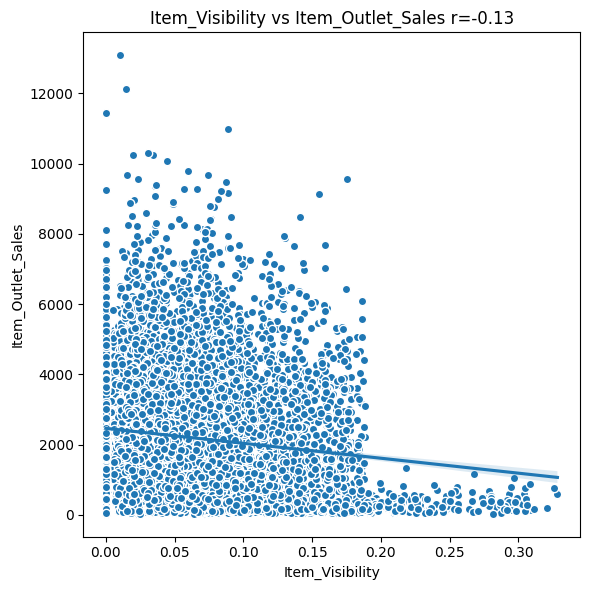

In [182]:
plot_numeric_vs_target(df,'Item_Visibility',truncate=True);
# inspect the two groups
# two rectangles here

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - yes, I would think the Greater than 0.20 of total display area of products, the lower item outler sale price profit.


- Does this feature appear to be a predictor of the target?
  - Yes, there is a positive correlation between the feature and the target (r=0.13)

ploting item outlet sales vs item MRP


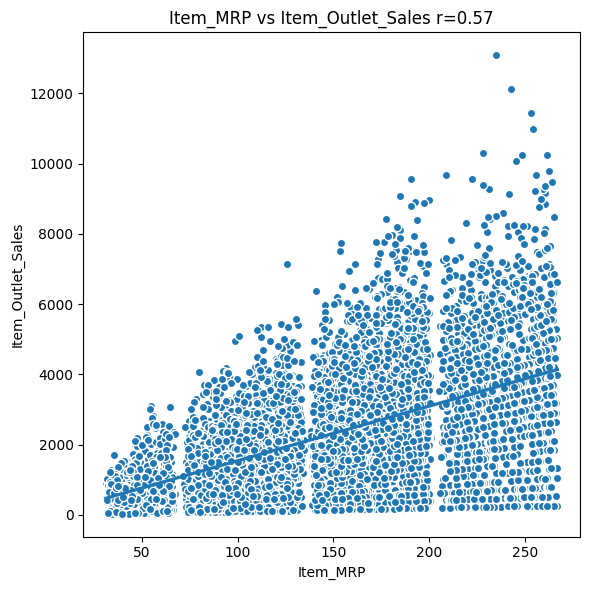

In [183]:
plot_numeric_vs_target(df,'Item_MRP',truncate=True);
#inspect the white spaces
#histograam for MRP to inspect white spaces , using ranges

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - yes, I would think the Greater MRP, the higher item outler sale price profit.


- Does this feature appear to be a predictor of the target?
  - Yes, there is a positive correlation between the feature and the target (r=0.57)

## Categorical multivariate visualization plotting


In [184]:
def plot_categorical_vs_target(df,x,y='Item_Outlet_Sales',placeholder='MISSING',fillna=True,figsize=(6,8),order_data=None):
  df_temp=df.copy()
  if fillna==True:
    df_temp[x]=df_temp[x].fillna(placeholder)
  missing_count=df_temp[x].isna().sum()
  missing_perc=missing_count/len(df_temp)*100
  ax=sns.barplot(data=df_temp,x=x,y=y,hue=x,linewidth=0.5,edgecolor='black',legend=False,alpha=0.6,errorbar=None);
  sns.stripplot(data=df_temp,x=x,y=y,hue=x,ax=ax,size=3,edgecolor='white',linewidth=0.5,legend=False,zorder=0);
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');
  ax.set(title=f'{x} vs {y}');
  fig.tight_layout();
  plt.show()
  print(f'- number of missing values in {x} is: {missing_count}, and it represent {missing_perc}% of it')
  #for nunique
  nunique = df_temp[x].nunique()
  print(f"- Unique Values: {nunique}")
  #for max value
  most_comm_ser=df_temp[x].value_counts(dropna=False)
  most_comm_index = most_comm_ser.index[0]
  most_comm_val=most_comm_ser[0]
  most_comm_per=round(most_comm_val/len(df_temp)*100,2)
  print(f'- Most common value is {most_comm_index} and it appears {most_comm_val} times, and it represent {most_comm_per}% of its data')

  if most_comm_per >98:
    print(f'- The value of {x} is constant ')
  else:
    print(f'- {x} data are quasi-constant')
  #droping


  return fig,ax



- Explore item fat content

<ipython-input-184-90cbfbecd940>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');


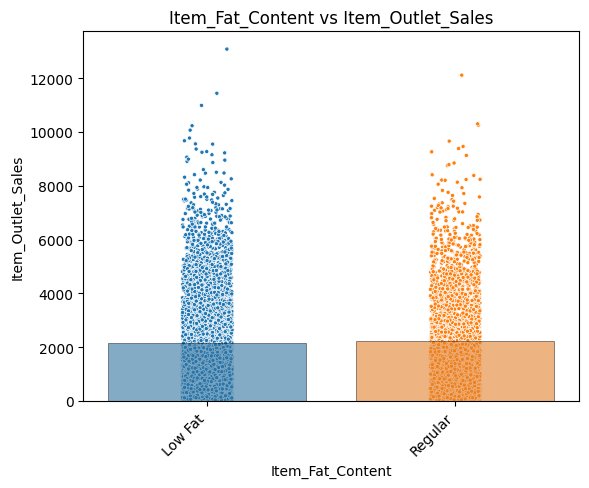

- number of missing values in Item_Fat_Content is: 0, and it represent 0.0% of it
- Unique Values: 2
- Most common value is Low Fat and it appears 5517 times, and it represent 64.73% of its data
- Item_Fat_Content data are quasi-constant


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Item_Fat_Content vs Item_Outlet_Sales'}, xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>)

In [185]:
plot_categorical_vs_target(df,'Item_Fat_Content')

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - no, I wouldn't expect the fat content affect item outlet sale since


- Does this feature appear to be a predictor of the target?
  - No, values are spread equally except some outliers

- Explore outlet type

<ipython-input-184-90cbfbecd940>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');


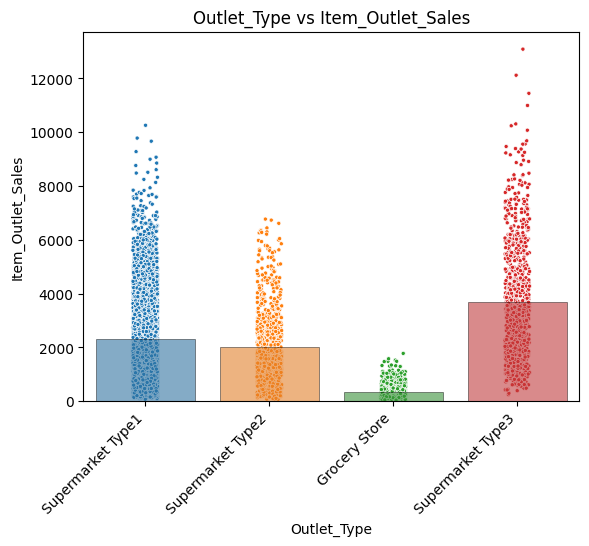

- number of missing values in Outlet_Type is: 0, and it represent 0.0% of it
- Unique Values: 4
- Most common value is Supermarket Type1 and it appears 5577 times, and it represent 65.43% of its data
- Outlet_Type data are quasi-constant


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Type vs Item_Outlet_Sales'}, xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>)

In [186]:
plot_categorical_vs_target(df,'Outlet_Type')

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  -  Yes, I would expect the outlet type to affect the outlet sale value (either positively or negatively).


- Does this feature appear to be a predictor of the target?
  - Yes, there is variability across supermarket type in terms of the means as well as the range of values.



# preprocessing

## Splting X and y

In [187]:
# Define features and target
X = df.drop(columns = ['Item_Outlet_Sales','Item_Identifier'])
y = df['Item_Outlet_Sales']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## numric

In [188]:
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)

scaler = StandardScaler()
median_imputer = SimpleImputer(strategy='median')



num_pipe = make_pipeline(median_imputer, scaler)



num_tuple = ('numeric',num_pipe, num_cols)
num_tuple

Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

## Ordinal

In [189]:
ord_cols = ['Item_Fat_Content', 'Outlet_Size']
print("Ordinal Columns:", ord_cols)


impute_na_ord = SimpleImputer(strategy='most_frequent', fill_value='NA')


itemfatorder = ['Low Fat', 'Regular']

outletsizeorder = ['Small' , 'Medium', 'Large']


ordinal_category_orders = [itemfatorder, outletsizeorder]


ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)


scaler_ord = StandardScaler()

ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
ord_pipe


ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

Ordinal Columns: ['Item_Fat_Content', 'Outlet_Size']


('ordinal',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='most_frequent')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['Low Fat', 'Regular'],
                                             ['Small', 'Medium', 'Large']])),
                 ('standardscaler', StandardScaler())]),
 ['Item_Fat_Content', 'Outlet_Size'])

## catogircal

In [190]:
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
print("OneHotEncoder Columns:", ohe_cols)

cat_freq_imputer = SimpleImputer(strategy='most_frequent')
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

cat_pipe = make_pipeline(cat_freq_imputer, ohe)

ohe_tuple = ('categorical',cat_pipe, ohe_cols)
ohe_tuple


OneHotEncoder Columns: Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


('categorical',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type',
        'Outlet_Type'],
       dtype='object'))

## Columns transformer

## instataing column transformer

In [191]:
preprocessor = ColumnTransformer([num_tuple,ohe_tuple,ord_tuple], verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',...
                                 Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Low '
                                                                              'Fat',
                                                                              'Regular'],
                                                                             ['Small',
                                                                              'Medium',
                                                                              'Large']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Fat_Content', 'Outlet_Size'])],
                  verbose_feature_names_out=False)

# Modeling


In [192]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics
def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )
  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)



In [193]:
dec_tree=DecisionTreeClassifier(random_state=42)


dec_tree=make_pipeline(preprocessor,dec_tree)
dec_tree

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strateg...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Low '
                                                                                               'Fat',
                                                                                               'Regular'],
                                                                                              ['Small',
                                                                                               'Medium',
                                                                                               'Large']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Item_Fat_Content',
                                                   'Outlet_Size'])],
                                   verbose_feature_names_out=False)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

## Default Bagged Trees

In [194]:
bagreg = BaggingRegressor(random_state = 42)

In [195]:
# Model Pipeline with default preprocessor and default model
bagreg_pipe = make_pipeline(preprocessor, bagreg)

### Fit the model pipeline on the training data

In [196]:
bagreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strateg...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Low '
                                                                                               'Fat',
                                                                                               'Regular'],
                                                                                              ['Small',
                                                                                               'Medium',
                                                                                               'Large']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Item_Fat_Content',
                                                   'Outlet_Size'])],
                                   verbose_feature_names_out=False)),
                ('baggingregressor', BaggingRegressor(random_state=42))])

In [197]:
results_df = evaluate_regression(bagreg_pipe,X_train, y_train, X_test, y_test, verbose = False, output_frame = True)
results_df.round(2)

,MAE,MSE,RMSE,R^2
Training Data,320.89,242570.45,492.51,0.92
Test Data,778.48,1274455.38,1128.92,0.54


MAE: 785.06
MSE:1282522.17
RMSE:	1132.48
R^2: 0.54


- Based on the metrics calculated for both the training and test data sets, we can draw the following conclusions:
  - Mean Absolute Error (MAE):
Training Data: MAE is 319.51. This indicates that, on average, the model's predictions on the training data are approximately 319 USD off from the actual target values.
Test Data: MAE is 785.06. This suggests that, on average, the model's predictions on the test data are approximately $785.06 off from the actual target values. The higher MAE on the test data compared to the training data indicates potential overfitting or poor generalization of the model to unseen data.
  - Coefficient of Determination (R²):
Training Data: R² is 0.92. This indicates that approximately 92% of the variance in the target variable is explained by the model on the training data.
Test Data: R² is 0.5. This indicates that approximately 50% of the variance in the target variable is explained by the model on the test data. A lower R² on the test data compared to the training data suggests that the model's performance is not as good when applied to unseen data, indicating potential overfitting or poor generalizatio


In summary, while the model performs well on the training data with high R² and relatively low errors, its performance on the test data is poorer, with higher errors and lower R², indicating potential overfitting and poor generalization. Further investigation and model refinement may be necessary to improve its performance on unseen data.

## Tuning Bagged Trees

In [198]:
# Obtain list of parameters
bagreg_pipe.get_params()


{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
          'Outlet_Establishment_Year'],
         dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',...
                                    Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type',
          'Outlet_Type'],
         dtype='object')),
 

### Define the targeted parameters to be tuned

In [199]:
param_grid = {'baggingregressor__n_estimators': [5, 10, 20, 30, 40, 50],
              'baggingregressor__max_samples' : [.5, .7, .9, ],
              'baggingregressor__max_features': [.5, .7, .9 ]}

### Instaniate the gridsearch

In [200]:
gridsearch = GridSearchCV(bagreg_pipe, param_grid, n_jobs=-1, verbose=1)


### Fit the gridsearch on the training data

In [201]:
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('simpleimputer...
                                                                                                                      'Large']])),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Item_Fat_Content',
                                                                          'Outlet_Size'])],
                                                          verbose_feature_names_out=False)),
                                       ('baggingregressor',
                                        BaggingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'baggingregressor__max_features': [0.5, 0.7, 0.9],
                         'baggingregressor__max_samples': [0.5, 0.7, 0.9],
                         'baggingregressor__n_estimators': [5, 10, 20, 30, 40,
                                                            50]},
             verbose=1)

### Evaluting the Tuned Bagged Trees Model

In [202]:
# Define a model with the best parameters already refit on the entire training set
best_bagreg_grid = gridsearch.best_estimator_
# Evalute the tuned model
evaluate_regression(best_bagreg_grid, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 490.379
- MSE = 486,757.514
- RMSE = 697.680
- R^2 = 0.836

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 762.723
- MSE = 1,174,967.284
- RMSE = 1,083.959
- R^2 = 0.574


-
Based on the metrics calculated for both the training and test data sets, the following differences were observed before and after tuning the mode

  - Mean Absolute Error (MAE): On the training data, the MAE increased from 320 to 489 after tuning, indicating that, on average, the model's predictions were approximately $169 further from the actual target values.
Conversely, on the test data, the MAE decreased from 785 to 765 after tuning, indicating a slight improvement in the model's performance, with predictions approximately 20 USD closer to the actual values.

  - Coefficient of Determination (R²): On the training data, the R² decreased from 0.92 to 0.84 after tuning, indicating a reduction in the model's ability to explain the variance in the target variable. However, on the test data, the R² increased from 0.5 to 0.57 after tuning, suggesting a slight improvement in the model's performance in explaining the variance.
  
These differences highlight the trade-offs involved in model tuning. While improvements were observed in some performance metrics, such as MAE and RMSE on the test data, other metrics, such as R² on the training data, showed a decline. Further refinement may be necessary to achieve a better balance and enhance overall model performance

## Default Random Forest

### Random Forest Default

### Instantiate the Model


In [203]:
rf = RandomForestRegressor(random_state = 42)

### Model Pipeline

In [204]:
rf_pipe = make_pipeline(preprocessor, rf)

### Fit the model pipeline on the training data

In [205]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strateg...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Low '
                                                                                               'Fat',
                                                                                               'Regular'],
                                                                                              ['Small',
                                                                                               'Medium',
                                                                                               'Large']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Item_Fat_Content',
                                                   'Outlet_Size'])],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

### evaluation the model before tuning

In [206]:
# Call custom function for evaluation
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)


------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 296.688
- MSE = 183,059.434
- RMSE = 427.854
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 767.294
- MSE = 1,221,681.936
- RMSE = 1,105.297
- R^2 = 0.557


- Despite attempts to fine-tune the random forest model, it has become overly tailored to the training data, resulting in diminished accuracy without notable enhancements in performance on the test data.
- In contrast to linear regression, the random forest model demonstrates superior performance on the training dataset.
- The Mean Absolute Error (MAE) analysis reveals a discrepancy of around $734.473 in the predictions made on the testing data.

## Random Forest (Tuning)

#### Trying different parameters

In [207]:
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
          'Outlet_Establishment_Year'],
         dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',...
                                    Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type',
          'Outlet_Type'],
         dtype='object')),
 

In [208]:
# Define param grid with options to try
params_rf = {
    'randomforestregressor__max_depth': [None, 10, 15],
    'randomforestregressor__n_estimators': [10, 100],
    'randomforestregressor__min_samples_leaf': [2, 3],
    'randomforestregressor__max_features': ['sqrt', 'log2'],
    'randomforestregressor__oob_score': [True, False]
}

# Instantiate the gridsearch
gridsearch_rf = GridSearchCV(
    rf_pipe, params_rf, n_jobs=-1, cv=3, verbose=0
)

# Fit the gridsearch on training data
gridsearch_rf.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('simpleim...
                                                          verbose_feature_names_out=False)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 10, 15],
                         'randomforestregressor__max_features': ['sqrt',
                                                                 'log2'],
                         'randomforestregressor__min_samples_leaf': [2, 3],
                         'randomforestregressor__n_estimators': [10, 100],
                         'randomforestregressor__oob_score': [True, False]})

### Evaluate Tunned RF model

In [209]:
# Define and refit best model
best_rf = gridsearch_rf.best_estimator_
evaluate_regression(best_rf, X_train, y_train, X_test, y_test)



------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 625.988
- MSE = 787,117.009
- RMSE = 887.196
- R^2 = 0.734

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 750.998
- MSE = 1,135,736.075
- RMSE = 1,065.709
- R^2 = 0.588


- The refined random forest model stands out as the top performer, showcasing impressive metrics and efficacy.
- Achieving an accuracy level of around 60%, this model demonstrates consistent excellence across both training and testing datasets.
- The R-squared score reveals that approximately 60.3% of the data variability is captured by the model.
- Mean Absolute Error (MAE) analysis indicates that the model's predictions on the testing dataset deviate by approximately $728.637.

#  Tuned models comparison

In [210]:
print(f"BaggedTree:")
result_bg = evaluate_regression(best_bagreg_grid, X_train, y_train, X_test, y_test)
print()

print("-"*60)
print()
print(f"RandomForest:")
result_rf = evaluate_regression(best_rf, X_train, y_train, X_test, y_test)


BaggedTree:
------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 490.379
- MSE = 486,757.514
- RMSE = 697.680
- R^2 = 0.836

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 762.723
- MSE = 1,174,967.284
- RMSE = 1,083.959
- R^2 = 0.574

------------------------------------------------------------

RandomForest:
------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 625.988
- MSE = 787,117.009
- RMSE = 887.196
- R^2 = 0.734

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 750.998
- MSE = 1,135,736.075
- RMSE = 1,065.709
- R^2 = 0.588


- In summary, both models demonstrate decent predictive capabilities on the training data, with BaggedTree showing slightly better performance in terms of MAE, MSE, and RMSE compared to RandomForest. However, when evaluated on the test data, RandomForest exhibits slightly better performance in terms of R^2, indicating a better fit to the data.

- While both models perform reasonably well, RandomForest appears to be the better choice for this particular dataset due to its higher R^2 score on the test data. Nevertheless, further analysis and fine-tuning are recommended to optimize the model's performance on unseen data.

# Feature Importance

##Linear Regression Coefficients


In [211]:
from sklearn.linear_model import LinearRegression

In [217]:
# fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content,Outlet_Size
7503,0.341372,-0.776646,-0.998816,-1.293807,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.740321,1.958796
2957,-1.169135,0.100317,-1.585194,-0.102145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.740321,-1.384048
7031,0.388798,-0.482994,-1.595784,0.136187,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.350766,0.287374


In [159]:
# fitting a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df,y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.125
- MSE = 1,297,552.323
- RMSE = 1,139.102
- R^2 = 0.562

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.151
- MSE = 1,194,376.959
- RMSE = 1,092.876
- R^2 = 0.567


In [160]:
# Saving the coefficients
coeffs = pd.Series(lin_reg.coef_, index= feature_names)
coeffs['intercept'] = lin_reg.intercept_.round(2)
coeffs

Item_Weight                       -7.690903e+00
Item_Visibility                   -2.186338e+01
Item_MRP                           9.847341e+02
Outlet_Establishment_Year          1.303654e+15
Item_Type_Baking Goods            -1.244262e+14
Item_Type_Breads                  -1.244262e+14
Item_Type_Breakfast               -1.244262e+14
Item_Type_Canned                  -1.244262e+14
Item_Type_Dairy                   -1.244262e+14
Item_Type_Frozen Foods            -1.244262e+14
Item_Type_Fruits and Vegetables   -1.244262e+14
Item_Type_Hard Drinks             -1.244262e+14
Item_Type_Health and Hygiene      -1.244262e+14
Item_Type_Household               -1.244262e+14
Item_Type_Meat                    -1.244262e+14
Item_Type_Others                  -1.244262e+14
Item_Type_Seafood                 -1.244262e+14
Item_Type_Snack Foods             -1.244262e+14
Item_Type_Soft Drinks             -1.244262e+14
Item_Type_Starchy Foods           -1.244262e+14
Outlet_Identifier_OUT010          -2.045

In [161]:
df.select_dtypes('object').nunique()

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [162]:
# fitting a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df,y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.125
- MSE = 1,297,552.323
- RMSE = 1,139.102
- R^2 = 0.562

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.151
- MSE = 1,194,376.959
- RMSE = 1,092.876
- R^2 = 0.567


## Tree Based Model


In [257]:
bagreg = BaggingRegressor(random_state=42)
bagreg.fit(X_train_df, y_train)
evaluate_regression(bagreg, X_train_df, y_train, X_test_df,y_test)


------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 320.889
- MSE = 242,570.450
- RMSE = 492.514
- R^2 = 0.918

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 778.479
- MSE = 1,274,455.376
- RMSE = 1,128.918
- R^2 = 0.538


In [244]:
# Checking the number of feature importances matches the # of columns
print(len(reg.feature_importances_))
print(len(X_train_df.columns))
len(reg.feature_importances_) == len(X_train_df.columns)

39
39


True

- Saving the importances as a Pandas Series


In [245]:
# Saving the feature importances
importances = pd.Series(reg.feature_importances_, index= feature_names,
                       name='Feature Importance')
importances

Item_Weight                        0.052849
Item_Visibility                    0.099256
Item_MRP                           0.441817
Outlet_Establishment_Year          0.028540
Item_Type_Baking Goods             0.004111
Item_Type_Breads                   0.002525
Item_Type_Breakfast                0.002601
Item_Type_Canned                   0.004253
Item_Type_Dairy                    0.006421
Item_Type_Frozen Foods             0.005539
Item_Type_Fruits and Vegetables    0.008079
Item_Type_Hard Drinks              0.003035
Item_Type_Health and Hygiene       0.004241
Item_Type_Household                0.006592
Item_Type_Meat                     0.003638
Item_Type_Others                   0.001603
Item_Type_Seafood                  0.001694
Item_Type_Snack Foods              0.008387
Item_Type_Soft Drinks              0.005421
Item_Type_Starchy Foods            0.003420
Outlet_Identifier_OUT010           0.000012
Outlet_Identifier_OUT013           0.001721
Outlet_Identifier_OUT017        

In [246]:
# verifying that feature importances sum to 1
importances.sum()

1.0

In [247]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

In [248]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):

    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_

    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)

    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)

    return importances

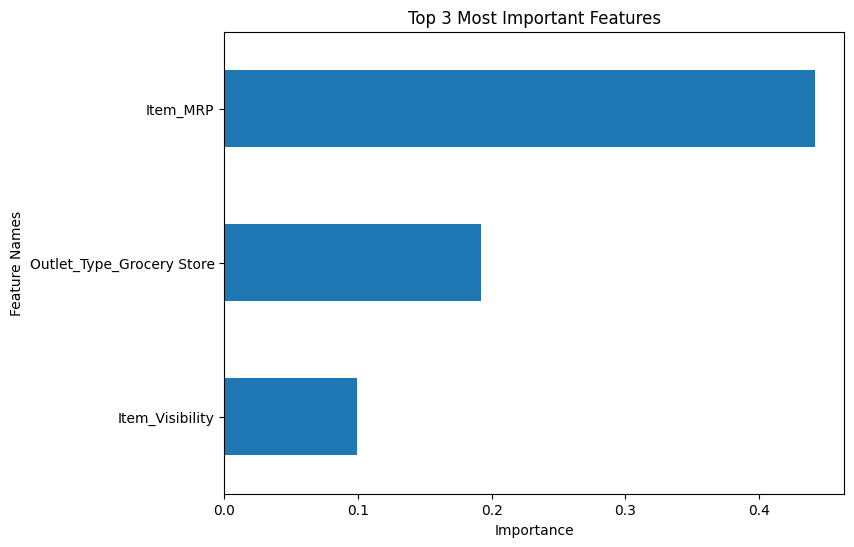

In [249]:
# testing our function
importances = get_importances(reg,sort=True,ascending=False,
                              name="RandomForest Importances")
plot_importance(importances,top_n=3);

- Item_MRP (Item Maximum Retail Price): With a coefficient of 0.441817, Item MRP has the highest importance in predicting sales. This indicates that the maximum retail price of an item has a significant positive effect on sales. Specifically, for every unit increase in the maximum retail price, sales are expected to increase by approximately 0.44 units, holding all other variables constant.
- Outlet_Type_Grocery Store: With an importance coefficient of 0.191730, the type of outlet being a grocery store is the second most important feature. This suggests that the type of outlet significantly affects sales, with grocery stores having a notable impact compared to other types of outlets.
- Item_Visibility: Item visibility, with an importance coefficient of 0.099256, is the third most important feature in predicting sales. This implies that the visibility of an item within the store plays a moderately important role in driving sales. Specifically, higher visibility tends to lead to higher sales, all else being equal.